# Dates

Unfortunately, sliding window uses tensors which doesn't support datetime, so we have to do some song-and-dance by converting the datetimes to strings, apply sliding window, then convert them back to datetimes

In [1]:
import sys
sys.path.append("/home/mgraca/Workspace/hrrr-smoke-viz/")
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '1'
import libs.pwwb.utils.dataset as utils
import pandas as pd
import numpy as np

/home/mgraca/miniconda3/envs/hrrrenv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2025-08-10 15:58:04.092876: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1754866684.104552   27398 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1754866684.108464   27398 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
dates = (
    pd
    .date_range("2023-08-02", "2025-08-02", freq='h', inclusive='left')
    .tz_localize("UTC")
)

X, Y = utils.sliding_window(data=dates.to_numpy(dtype='str'), frames=5, compute_targets=True)

print(X.shape, Y.shape)
print(X[5, 0], Y[0, 0])

I0000 00:00:1754866685.661292   27398 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 6301 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 2070 SUPER, pci bus id: 0000:01:00.0, compute capability: 7.5


(17535, 5) (17535, 5)
2023-08-02 05:00:00+00:00 2023-08-02 05:00:00+00:00


In [3]:
Y

array([['2023-08-02 05:00:00+00:00', '2023-08-02 06:00:00+00:00',
        '2023-08-02 07:00:00+00:00', '2023-08-02 08:00:00+00:00',
        '2023-08-02 09:00:00+00:00'],
       ['2023-08-02 06:00:00+00:00', '2023-08-02 07:00:00+00:00',
        '2023-08-02 08:00:00+00:00', '2023-08-02 09:00:00+00:00',
        '2023-08-02 10:00:00+00:00'],
       ['2023-08-02 07:00:00+00:00', '2023-08-02 08:00:00+00:00',
        '2023-08-02 09:00:00+00:00', '2023-08-02 10:00:00+00:00',
        '2023-08-02 11:00:00+00:00'],
       ...,
       ['2025-08-01 17:00:00+00:00', '2025-08-01 18:00:00+00:00',
        '2025-08-01 19:00:00+00:00', '2025-08-01 20:00:00+00:00',
        '2025-08-01 21:00:00+00:00'],
       ['2025-08-01 18:00:00+00:00', '2025-08-01 19:00:00+00:00',
        '2025-08-01 20:00:00+00:00', '2025-08-01 21:00:00+00:00',
        '2025-08-01 22:00:00+00:00'],
       ['2025-08-01 19:00:00+00:00', '2025-08-01 20:00:00+00:00',
        '2025-08-01 21:00:00+00:00', '2025-08-01 22:00:00+00:00',
      

In [4]:
Y_dates = (
    pd
    .to_datetime(Y[:,0], utc=True)
    .tz_convert(tz="US/Pacific")
    #.to_numpy(dtype='datetime64')
    #.reshape(Y.shape)
)
X_dates = (
    pd
    .to_datetime(X[:,0], utc=True)
    .tz_convert(tz="US/Pacific")
    #.to_numpy(dtype='datetime64')
    #.reshape(Y.shape)
)
X_dates.shape, Y_dates.shape

((17535,), (17535,))

In [5]:
Y_dates

DatetimeIndex(['2023-08-01 22:00:00-07:00', '2023-08-01 23:00:00-07:00',
               '2023-08-02 00:00:00-07:00', '2023-08-02 01:00:00-07:00',
               '2023-08-02 02:00:00-07:00', '2023-08-02 03:00:00-07:00',
               '2023-08-02 04:00:00-07:00', '2023-08-02 05:00:00-07:00',
               '2023-08-02 06:00:00-07:00', '2023-08-02 07:00:00-07:00',
               ...
               '2025-08-01 03:00:00-07:00', '2025-08-01 04:00:00-07:00',
               '2025-08-01 05:00:00-07:00', '2025-08-01 06:00:00-07:00',
               '2025-08-01 07:00:00-07:00', '2025-08-01 08:00:00-07:00',
               '2025-08-01 09:00:00-07:00', '2025-08-01 10:00:00-07:00',
               '2025-08-01 11:00:00-07:00', '2025-08-01 12:00:00-07:00'],
              dtype='datetime64[ns, US/Pacific]', length=17535, freq=None)

In [6]:
from libs.airnowdata import AirNowData

airnow_data = AirNowData(
    start_date=0,
    end_date=0,
    extent=(0, 0, 0, 0),
    airnow_api_key=None,
    save_dir='/home/mgraca/Workspace/hrrr-smoke-viz/pwwb-experiments/tensorflow/data/two_years_sat_data/airnow_cache/airnow.json',
    processed_cache_dir='/home/mgraca/Workspace/hrrr-smoke-viz/pwwb-experiments/tensorflow/data/two_years_sat_data/airnow_cache/airnow_processed.npz',
    frames_per_sample=0,
    dim=40,
    elevation_path="/home/mgraca/Workspace/hrrr-smoke-viz/libs/inputs/elevation.npy",
    use_mask=False,
    force_reprocess=False
)
X_airnow = airnow_data.data
Y_targets = airnow_data.target_stations

Mask usage disabled. All sensors within extent will be included.
Loading processed AirNow data from cache: /home/mgraca/Workspace/hrrr-smoke-viz/pwwb-experiments/tensorflow/data/two_years_sat_data/airnow_cache/airnow_processed.npz
✓ Successfully loaded processed data from cache
  - Data shape: (17535, 5, 40, 40, 1)
  - Found 16 sensor locations


In [7]:
Y_targets.shape

(17535, 5, 16)

In [8]:
airnow_data.sensor_names[:8]

['Simi Valley - Cochran Street',
 'Reseda',
 'Santa Clarita',
 'North Holywood',
 'Los Angeles - N. Main Street',
 'Compton',
 'Long Beach Signal Hill',
 'Anaheim']

In [9]:
Y_mean_targets = np.mean(Y_targets, axis=-1)[:, 0].copy()
Y_mean_targets.shape

(17535,)

# Mean PM 2.5 across LA and their dates

In [10]:
Y_mean_targets.shape, Y_dates.shape

((17535,), (17535,))

In [11]:
np.mean(Y_mean_targets[np.where(Y_dates.month == 1)])

9.8155155

In [12]:
np.mean(Y_mean_targets[np.where(Y_dates.month == 2)])

7.920567

Index([8, 9, 10, 11, 12, 1, 2, 3, 4, 5, 6, 7], dtype='int32')


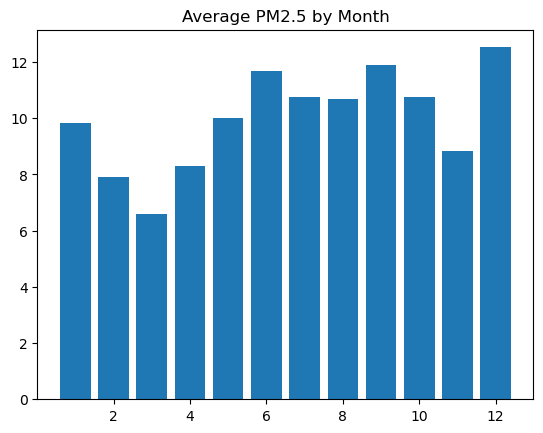

In [13]:
import matplotlib.pyplot as plt
print(Y_dates.month.unique())
plt.title("Average PM2.5 by Month")
plt.bar(Y_dates.month.unique(), [np.mean(Y_mean_targets[np.where(Y_dates.month == month)]) for month in Y_dates.month.unique()])
plt.show()

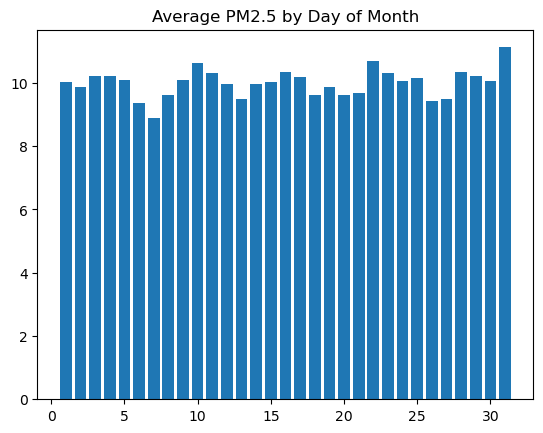

In [14]:
plt.title("Average PM2.5 by Day of Month")
plt.bar(Y_dates.day.unique(), [np.mean(Y_mean_targets[np.where(Y_dates.day == day)]) for day in Y_dates.day.unique()])
plt.show()

Index([22, 23,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
       16, 17, 18, 19, 20, 21],
      dtype='int32')


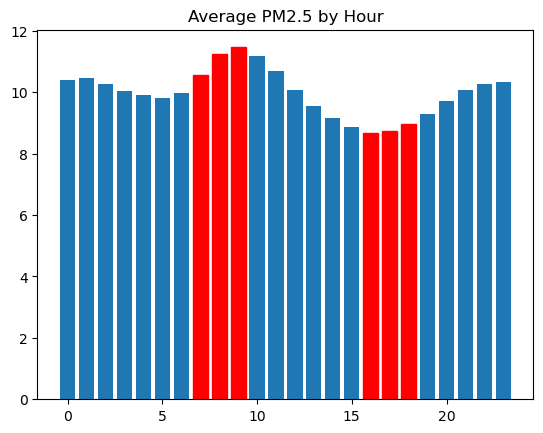

In [15]:
plt.title("Average PM2.5 by Hour")
print(Y_dates.hour.unique())
bar = plt.bar(Y_dates.hour.unique(), [np.mean(Y_mean_targets[np.where(Y_dates.hour == hour)]) for hour in Y_dates.hour.unique()])
for i in range(7+2, 10+2):
    bar[i].set_color('red')
for i in range(12+4+2, 12+7+2):
    bar[i].set_color('red')
plt.show()

Index([1, 2, 3, 4, 5, 6, 0], dtype='int32')


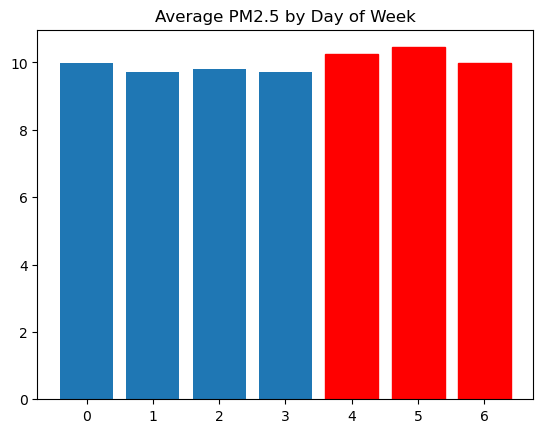

In [16]:
plt.title("Average PM2.5 by Day of Week")
print(Y_dates.dayofweek.unique())
bar = plt.bar(Y_dates.dayofweek.unique(), [np.mean(Y_mean_targets[np.where(Y_dates.dayofweek == dayofweek)]) for dayofweek in Y_dates.dayofweek.unique()])
for i in range(4-1, 7-1):
    bar[i].set_color('red')
plt.show()

https://gero.usc.edu/airpollbrain-group/wp-content/uploads/2020/07/zhao..vanos-2018-1-s2.0-S1352231018305715-main.pdf

Specifically, **relatively high PM 2.5** concentrations tend to appear in the month of **January** and on **Fridays**, and PM 2.5 concentrations on **Sunday are generally lower** than those on most other days of the week. However, we discovered that **high PM 2.5** concentrations are also likely to appear in **July**. Additionally, compared to Fridays in most studies, the **highest PM 2.5** concentrations are found to more likely occur on **Saturdays**, while the **lowest** concentrations are found **on Monday** as universally as **on Sunday**. 

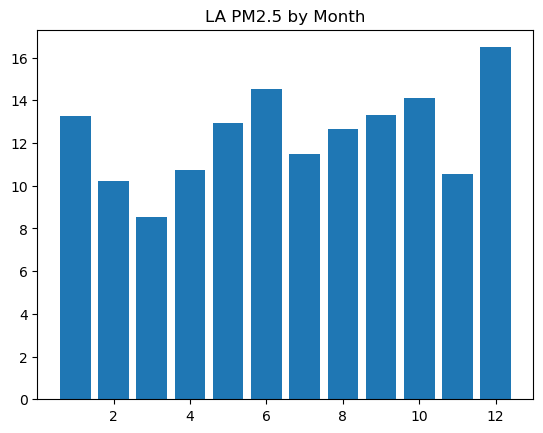

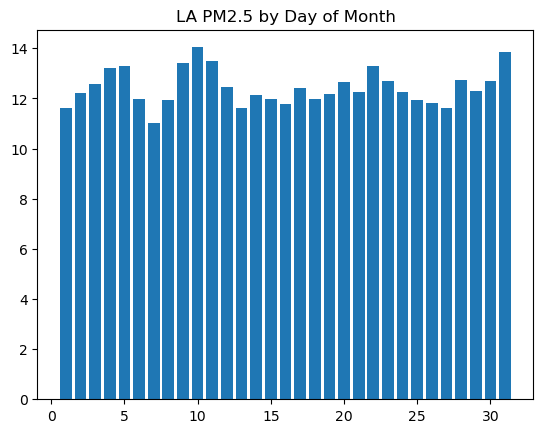

Index([22, 23,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
       16, 17, 18, 19, 20, 21],
      dtype='int32')


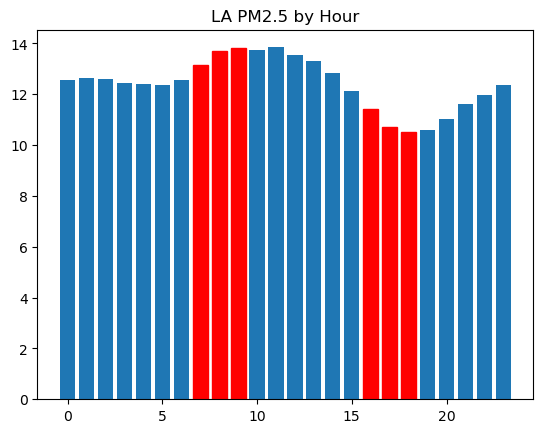

Index([1, 2, 3, 4, 5, 6, 0], dtype='int32')


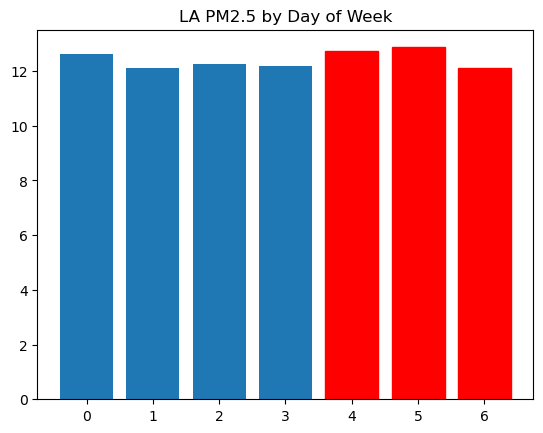

In [17]:
Y_targets_LA = Y_targets[:, 0, 4].copy()
plt.title("LA PM2.5 by Month")
plt.bar(Y_dates.month.unique(), [np.mean(Y_targets_LA[np.where(Y_dates.month == month)]) for month in Y_dates.month.unique()])
plt.show()
plt.title("LA PM2.5 by Day of Month")
plt.bar(Y_dates.day.unique(), [np.mean(Y_targets_LA[np.where(Y_dates.day == day)]) for day in Y_dates.day.unique()])
plt.show()
plt.title("LA PM2.5 by Hour")
print(Y_dates.hour.unique())
bar = plt.bar(Y_dates.hour.unique(), [np.mean(Y_targets_LA[np.where(Y_dates.hour == hour)]) for hour in Y_dates.hour.unique()])
for i in range(7+2, 10+2):
    bar[i].set_color('red')
for i in range(12+4+2, 12+7+2):
    bar[i].set_color('red')
plt.show()
plt.title("LA PM2.5 by Day of Week")
print(Y_dates.dayofweek.unique())
bar = plt.bar(Y_dates.dayofweek.unique(), [np.mean(Y_targets_LA[np.where(Y_dates.dayofweek == dayofweek)]) for dayofweek in Y_dates.dayofweek.unique()])
for i in range(4-1, 7-1):
    bar[i].set_color('red')
plt.show()

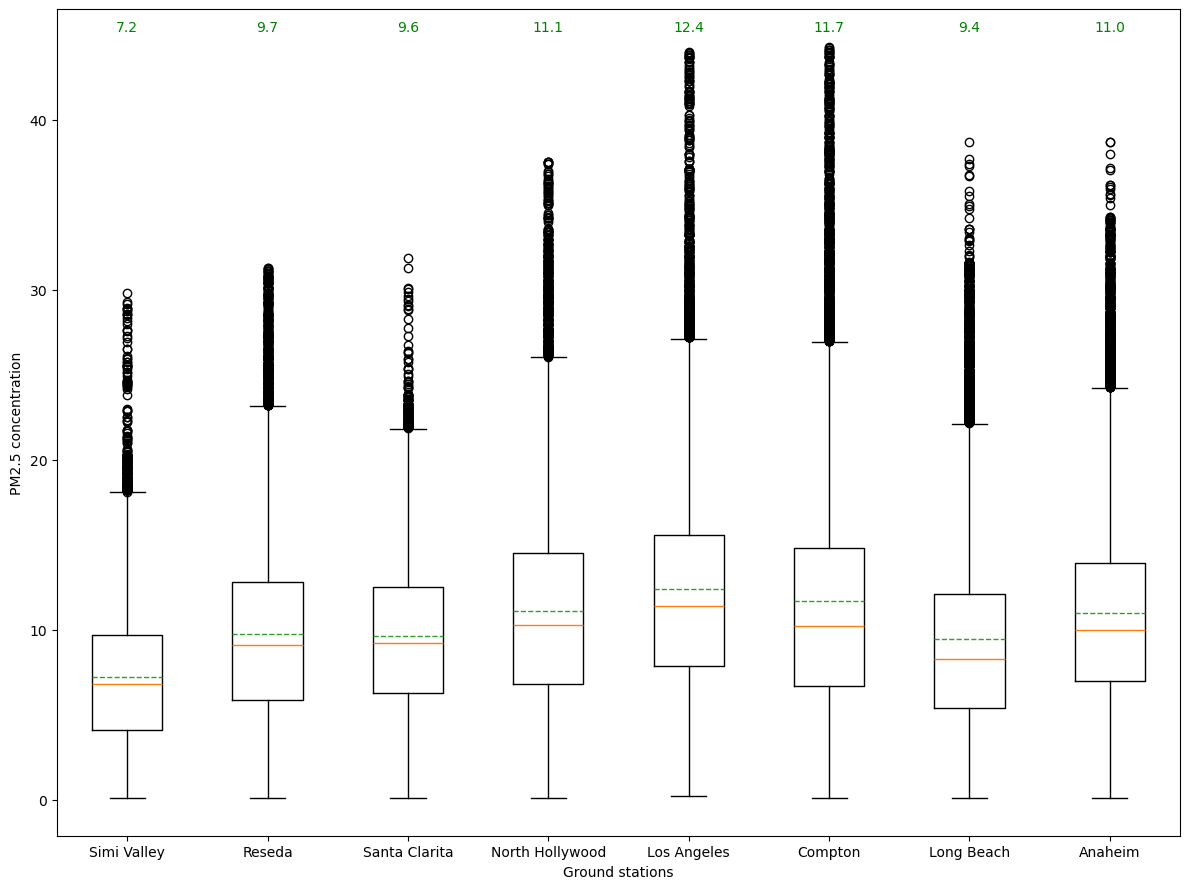

In [18]:
fig = plt.figure(figsize =(12, 9))
trimmed_sensor_names = trimmed_sensor_names = [
    'Simi Valley', 'Reseda', 'Santa Clarita', 'North Hollywood', 
    'Los Angeles', 'Compton', 'Long Beach', 'Anaheim',
]
bp = plt.boxplot(
    Y_targets[:,0,:8], 
    tick_labels=trimmed_sensor_names, 
    meanline=True, 
    showmeans=True
)

# collect means and put them on the top row
upper_bound_text = np.max(Y_targets) + 0.75
for i, mean in enumerate([mean.get_ydata()[0] for mean in bp['means']]):
    plt.text(i+1, upper_bound_text, f"{mean:.1f}", ha='center', va='bottom', color='green')
plt.ylabel("PM2.5 concentration")
plt.xlabel("Ground stations")
plt.tight_layout()
plt.show()

# Correlation

In [19]:
from libs.goesdata import GOESData
goes_data = GOESData(
    start_date="2025-01-10 00:00",
    end_date="2025-01-10 00:59",
    extent=(-118.75, -117.0, 33.5, 34.5),
    dim=40,
    frames_per_sample=5,
    save_dir=None,      # where nc4 files should be saved to
    cache_path="/home/mgraca/Workspace/hrrr-smoke-viz/pwwb-experiments/tensorflow/data/two_years_sat_data/goes_cache/goes_processed.npz",    # location where to save or load cache data
    load_cache=True,   # determines if data should be loaded from cache_dir
    save_cache=False,    # determines if data should be written to cache_dir
    verbose=False,
    pre_downloaded=False,   # set to True if user already dl'd from aws
)
goes_data.data.shape

📂 Loading data from /home/mgraca/Workspace/hrrr-smoke-viz/pwwb-experiments/tensorflow/data/two_years_sat_data/goes_cache/goes_processed.npz... ✅ Completed!


(17535, 5, 40, 40, 1)

In [20]:
avg_aod = np.mean(goes_data.data.reshape(goes_data.data.shape[0], -1), -1)
avg_pm25 = np.mean(airnow_data.data.reshape(airnow_data.data.shape[0], -1), -1)
avg_target_pm25 = Y_mean_targets
avg_aod.shape, avg_pm25.shape, avg_target_pm25.shape

((17535,), (17535,), (17535,))

In [21]:
X_dates.shape, Y_dates.shape

((17535,), (17535,))

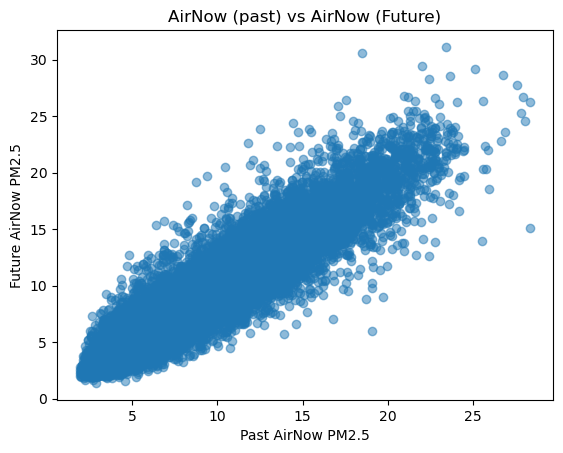

In [22]:
plt.scatter(avg_pm25, avg_target_pm25, alpha=0.5)

plt.xlabel("Past AirNow PM2.5")
plt.ylabel("Future AirNow PM2.5")
plt.title("AirNow (past) vs AirNow (Future)")

plt.show()

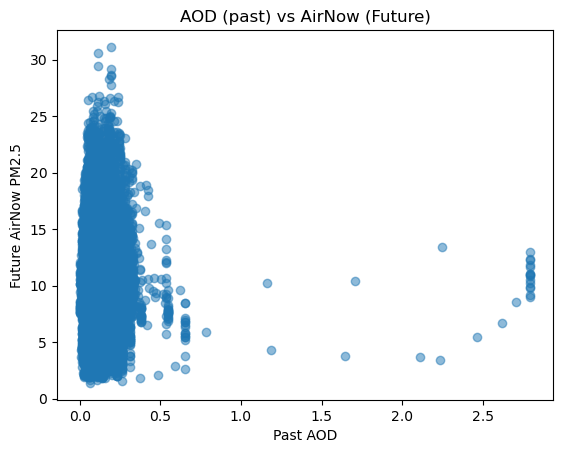

In [23]:
plt.scatter(avg_aod, avg_target_pm25, alpha=0.5)

plt.xlabel("Past AOD")
plt.ylabel("Future AirNow PM2.5")
plt.title("AOD (past) vs AirNow (Future)")

plt.show()

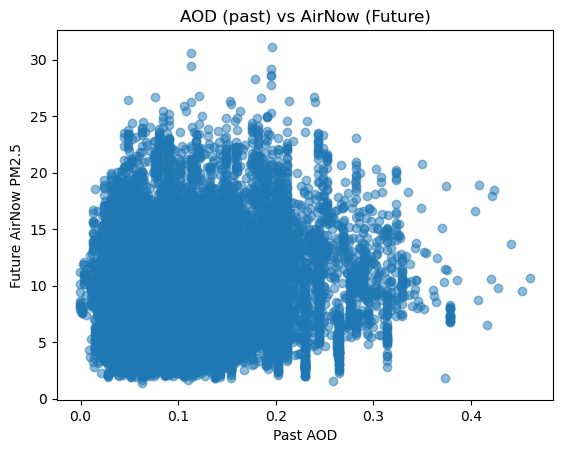

In [24]:
plt.scatter(
    np.where(abs(avg_aod - np.mean(avg_aod)) >= 3 * np.std(avg_aod), np.mean(avg_aod), avg_aod),
    avg_target_pm25,
    alpha=0.5
)

plt.xlabel("Past AOD")
plt.ylabel("Future AirNow PM2.5")
plt.title("AOD (past) vs AirNow (Future)")

plt.show()

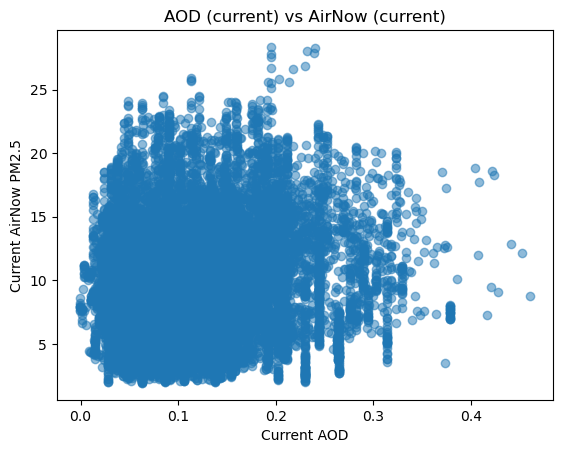

In [25]:
plt.scatter(
    np.where(abs(avg_aod - np.mean(avg_aod)) >= 3 * np.std(avg_aod), np.mean(avg_aod), avg_aod),
    avg_pm25,
    alpha=0.5
)
plt.xlabel("Current AOD")
plt.ylabel("Current AirNow PM2.5")
plt.title("AOD (current) vs AirNow (current)")

plt.show()

(8032,)


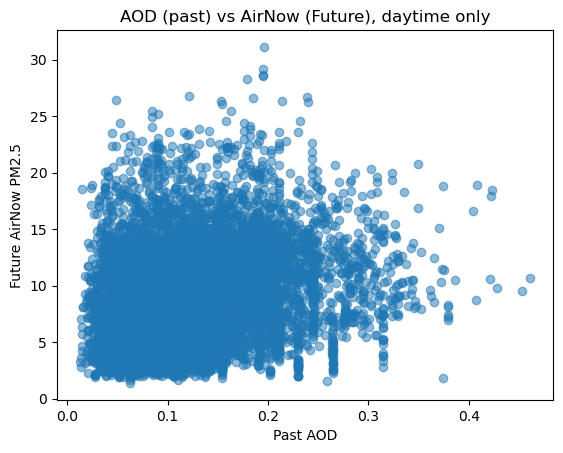

In [26]:
daytime_idxs = np.where((X_dates.hour > 6) & (X_dates.hour < 18))
avg_daytime_aod = avg_aod[daytime_idxs]
print(daytime_idxs[0].shape)
plt.scatter(
    np.where(abs(avg_daytime_aod - np.mean(avg_daytime_aod)) >= 3 * np.std(avg_daytime_aod), np.mean(avg_daytime_aod), avg_daytime_aod),
    avg_target_pm25[daytime_idxs],
    alpha=0.5
)
plt.xlabel("Past AOD")
plt.ylabel("Future AirNow PM2.5")
plt.title("AOD (past) vs AirNow (Future), daytime only")

plt.show()

(9503,)


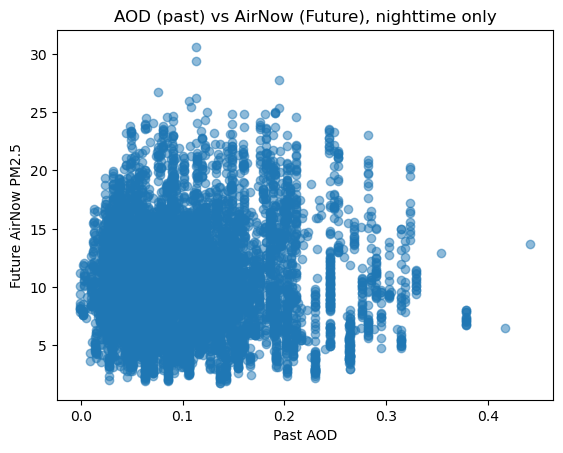

In [27]:
nighttime_idxs = np.where((X_dates.hour <= 6) | (X_dates.hour >= 18))
avg_nighttime_aod = avg_aod[nighttime_idxs]
print(nighttime_idxs[0].shape)
plt.scatter(
    np.where(abs(avg_nighttime_aod - np.mean(avg_nighttime_aod)) >= 3 * np.std(avg_nighttime_aod), np.mean(avg_nighttime_aod), avg_nighttime_aod),
    avg_target_pm25[nighttime_idxs],
    alpha=0.5
)
plt.xlabel("Past AOD")
plt.ylabel("Future AirNow PM2.5")
plt.title("AOD (past) vs AirNow (Future), nighttime only")

plt.show()

In [34]:
wind_data = np.load('/home/mgraca/Workspace/hrrr-smoke-viz/pwwb-experiments/tensorflow/data/two_years_sat_data/pwwb_cache/two_years_sat_data_METAR_WIND_UV_full_data.npy')
wind_data.shape

(17535, 5, 40, 40, 2)

In [35]:
avg_wind_u = np.mean(wind_data[:, :, :, 0].reshape(wind_data.shape[0], -1), -1)
avg_wind_v = np.mean(wind_data[:, :, :, 1].reshape(wind_data.shape[0], -1), -1)
avg_wind_u.shape, avg_wind_v.shape

((17535,), (17535,))

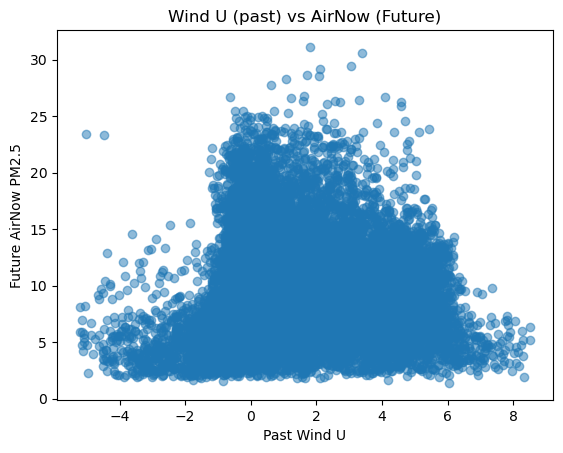

In [39]:
plt.scatter(
    np.where(abs(avg_wind_u - np.mean(avg_wind_u)) >= 3 * np.std(avg_wind_u), np.mean(avg_wind_u), avg_wind_u),
    avg_target_pm25,
    alpha=0.5
)
plt.xlabel("Past Wind U")
plt.ylabel("Future AirNow PM2.5")
plt.title("Wind U (past) vs AirNow (Future)")

plt.show()

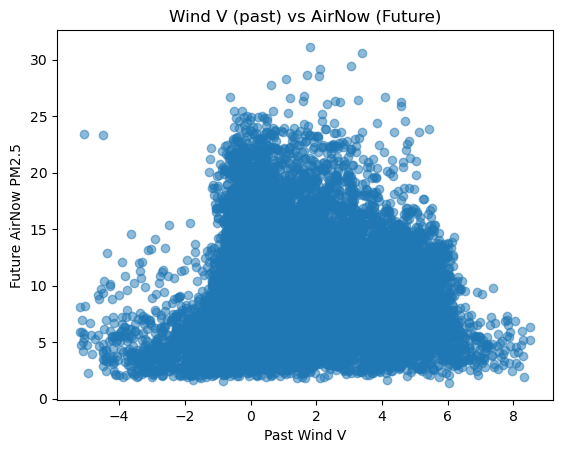

In [40]:
plt.scatter(
    np.where(abs(avg_wind_v - np.mean(avg_wind_v)) >= 3 * np.std(avg_wind_v), np.mean(avg_wind_v), avg_wind_v),
    avg_target_pm25,
    alpha=0.5
)
plt.xlabel("Past Wind V")
plt.ylabel("Future AirNow PM2.5")
plt.title("Wind V (past) vs AirNow (Future)")

plt.show()

In [49]:
np.count_nonzero(np.isclose(avg_wind_u, avg_wind_v))

86

In [42]:
avg_wind_speed = np.sqrt(avg_wind_u*avg_wind_u + avg_wind_v*avg_wind_v)
avg_wind_speed.shape

(17535,)

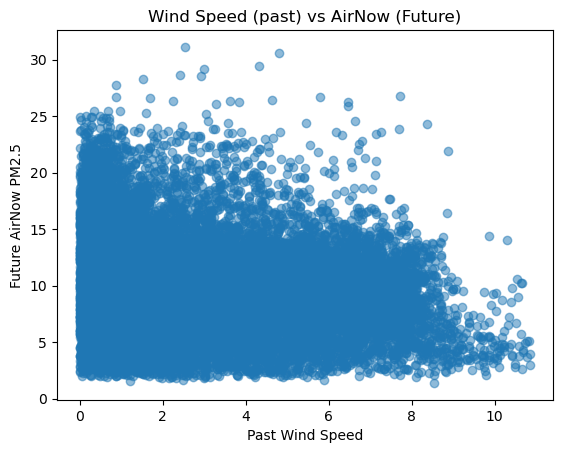

In [45]:
plt.scatter(
    np.where(abs(avg_wind_speed - np.mean(avg_wind_speed)) >= 3 * np.std(avg_wind_speed), np.mean(avg_wind_speed), avg_wind_speed),
    avg_target_pm25,
    alpha=0.5
)
plt.xlabel("Past Wind Speed")
plt.ylabel("Future AirNow PM2.5")
plt.title("Wind Speed (past) vs AirNow (Future)")

plt.show()